# Análisis de Clustering de Clientes Bancarios
Este notebook realiza un análisis de clustering utilizando un dataset importado de clientes bancarios.


## Descripción
Este análisis busca identificar perfiles de clientes bancarios mediante un modelo de clustering. Se utiliza información sobre características financieras y comportamientos para agrupar a los clientes en diferentes clusters.

### Flujo del análisis
1. **Importación de los datos**: Se cargan y revisan los datos para asegurar que estén listos para el análisis.
2. **Preparación del dataset**: Se estandarizan las variables y se manejan las categóricas.
3. **Aplicación del modelo K-Means**: Se crean los clusters y se visualizan en un espacio reducido con PCA.
4. **Análisis de los clusters**: Interpretación de los centroides y relación con las tipologías.
5. **Visualización de perfiles**: Se utiliza un gráfico de radar para comparar los clusters.

---


## Paso 1: Importar los datos

In [1]:

import pandas as pd

# Importar el dataset
df = pd.read_csv('datasetBanco.csv')

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

# Información general del dataset
print("\nInformación del dataset:")
print(df.info())


Primeras filas del dataset:
        Edad  Ingresos_Anuales  Saldo_Cuenta  Historial_Crédito  \
0  22.143422      29997.475590   7955.268256         693.511386   
1  21.601801      42090.140629   9907.083724         744.888573   
2  28.315486      29200.576097   1442.285831         664.459019   
3  28.063097      36260.977265   4027.960158         727.009289   
4  18.000000      33114.353479  12341.105106         645.590898   

   Número_Productos  Tarjeta_Crédito_Activa  Transacciones_Mensuales  \
0                 3                       1                34.881191   
1                 1                       1                47.182309   
2                 3                       1                28.121332   
3                 2                       1                64.276385   
4                 1                       1                43.236438   

   Nivel_Endeudamiento  Uso_Banca_En_Línea  Satisfacción_Cliente  \
0            10.251565                   1                     4   


## Paso 2: Preparación de los datos y Clustering

In [2]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

# Variables para clustering
variables_numericas = [
    'Edad', 'Ingresos_Anuales', 'Saldo_Cuenta', 'Historial_Crédito',
    'Número_Productos', 'Transacciones_Mensuales', 'Nivel_Endeudamiento', 'Satisfacción_Cliente'
]
variables_categoricas = ['Tarjeta_Crédito_Activa', 'Uso_Banca_En_Línea']

# Estandarizar las variables numéricas
scaler = StandardScaler()
X_numerical = scaler.fit_transform(df[variables_numericas])

# Obtener las variables categóricas
X_categorical = df[variables_categoricas].values

# Concatenar variables numéricas y categóricas
X = np.hstack((X_numerical, X_categorical))

# Reducir la dimensionalidad para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Aplicar K-Means con K=5
k_optimo = 5
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Añadir los clusters al DataFrame
df['Cluster'] = clusters

#Exportar con la columna cluster
df.to_csv('datasetBanco_concluster.csv', index=False)


## Paso 3: Visualización de los Clusters en el Espacio PCA

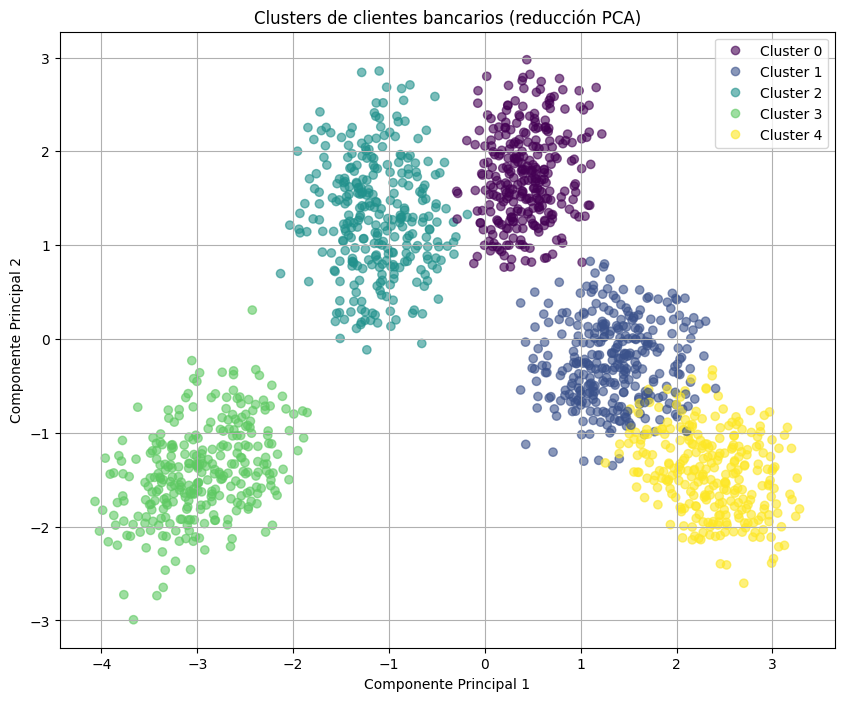

In [3]:

import matplotlib.pyplot as plt

# Visualizar los clusters con PCA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters de clientes bancarios (reducción PCA)')
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(k_optimo)])
plt.grid(True)
plt.show()


## Paso 4: Análisis de los Centroides

In [4]:

# Obtener los centroides
centroides = kmeans.cluster_centers_

# Deshacer la estandarización de los centroides numéricos
centroides_numericos = centroides[:, :len(variables_numericas)]
centroides_categoricos = centroides[:, len(variables_numericas):]

centroides_numericos_desescalados = scaler.inverse_transform(centroides_numericos)
centroides_df = pd.DataFrame(centroides_numericos_desescalados, columns=variables_numericas)

# Convertir los centroides categóricos a DataFrame
centroides_categoricos_df = pd.DataFrame(centroides_categoricos, columns=variables_categoricas)

# Combinar los centroides numéricos y categóricos
centroides_completos = pd.concat([centroides_df, centroides_categoricos_df], axis=1)

# Mostrar los centroides
print("Centroides de los clusters:")
print(centroides_completos)

# Interpretar los centroides
for i, row in centroides_completos.iterrows():
    print(f"\nCaracterísticas del Cluster {i}:")
    for variable in centroides_completos.columns:
        print(f"  {variable}: {row[variable]:.2f}")


Centroides de los clusters:
        Edad  Ingresos_Anuales   Saldo_Cuenta  Historial_Crédito  \
0  39.914533     134228.094305  126138.205893         749.849559   
1  53.650483     101383.232876  307236.563554         727.422441   
2  26.559883      52024.421860   10399.427436         675.126211   
3  37.476658      57450.735913    5432.530021         460.187688   
4  69.791941      62946.998034  628237.648048         777.430183   

   Número_Productos  Transacciones_Mensuales  Nivel_Endeudamiento  \
0          4.459732                34.630818            39.776368   
1          2.965732                12.631147            12.888588   
2          1.976589                63.703734            20.090083   
3          2.036667                20.480423            83.771271   
4          1.868794                 9.996497            12.166077   

   Satisfacción_Cliente  Tarjeta_Crédito_Activa  Uso_Banca_En_Línea  
0              4.000000                1.000000        5.302013e-01  
1       

## Paso 5: Visualización de Perfiles con Gráfico de Radar

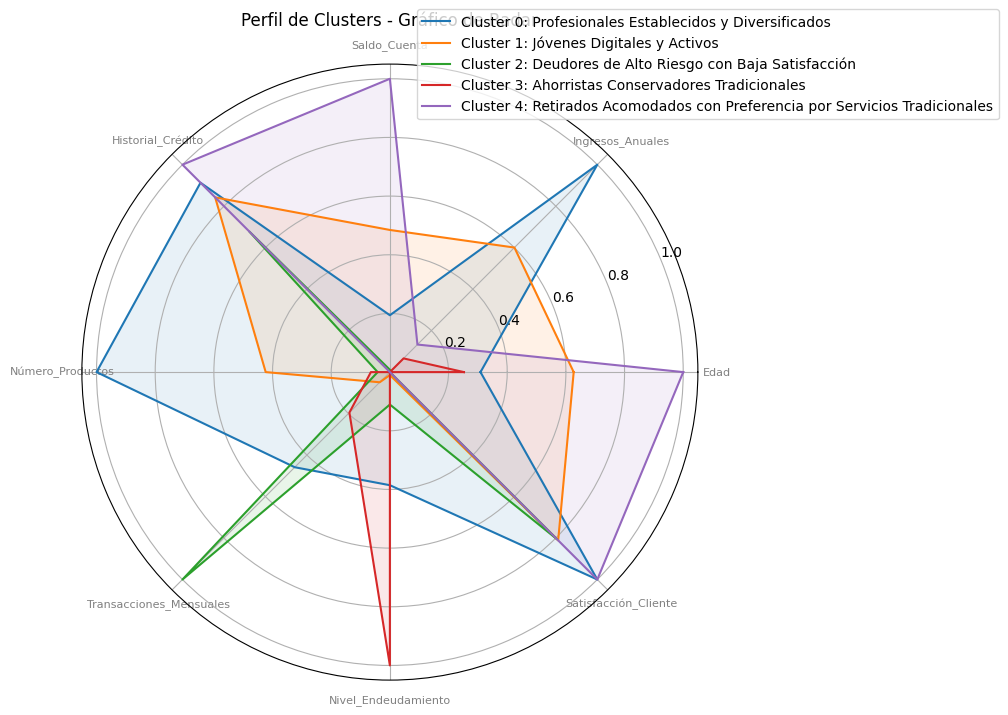

In [5]:

from sklearn.preprocessing import MinMaxScaler

# Tipologías de los clusters
tipologias = [
    'Profesionales Establecidos y Diversificados',    # Cluster 0
    'Jóvenes Digitales y Activos',                    # Cluster 1
    'Deudores de Alto Riesgo con Baja Satisfacción',  # Cluster 2
    'Ahorristas Conservadores Tradicionales',         # Cluster 3
    'Retirados Acomodados con Preferencia por Servicios Tradicionales'  # Cluster 4
]

# Normalizar los datos de los centroides
scaler_radar = MinMaxScaler()
centroides_normalizados = pd.DataFrame(scaler_radar.fit_transform(centroides_df), columns=variables_numericas)

# Añadir la primera fila al final para cerrar el gráfico de radar
centroides_normalizados = pd.concat([centroides_normalizados, centroides_normalizados.iloc[[0]]], ignore_index=True)

# Configuración de ángulos para el gráfico
categorias = list(centroides_normalizados.columns)
N = len(categorias)
angulos = [n / float(N) * 2 * np.pi for n in range(N)]
angulos += angulos[:1]

# Crear el gráfico de radar
plt.figure(figsize=(8, 8))

for i in range(len(centroides_normalizados)-1):
    valores = centroides_normalizados.iloc[i].values.flatten().tolist()
    valores += valores[:1]
    etiqueta = f'Cluster {i}: {tipologias[i]}'
    plt.polar(angulos, valores, label=etiqueta)
    plt.fill(angulos, valores, alpha=0.1)

plt.xticks(angulos[:-1], categorias, color='grey', size=8)
plt.title('Perfil de Clusters - Gráfico de Radar', size=12, y=1.05)
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.1))
plt.show()
